# TEDA Algorithm

- #### Algorithm developed in:

Angelov, Plamen. (2014). ***Anomaly detection based on eccentricity analysis***. 1-8. 10.1109/EALS.2014.7009497. 

- #### Code by:

Pedro Henrique Meira de Andrade (Git: pedrohmeiraa) - 14/jul/2022

- #### Text adapted from:

**Andrade, P.**; Silva, I.; Silva, M.; Flores, T.; Cassiano, J.; Costa, D.G. ***A TinyML Soft-Sensor Approach for Low-Cost Detection and Monitoring of Vehicular Emissions***. Sensors 2022, 22, 3838. https://doi.org/10.3390/s22103838

## 1. Definition

**TEDA** (*Typicality and Eccentricity Data Analytics*) algorithm was proposed by Angelov in 2014 to detect anomalies in data streams. This paper can be accessed at [Plamen Paper](https://www.researchgate.net/publication/301411485_Anomaly_detection_based_on_eccentricity_analysis).

Typicality is the similarity of a sample to the rest of the set (based on distances between samples), while eccentricity is its opposite when indicating how different a sample is from the rest of the collected data.
Datastreams.

TEDA uses the sum of the geometric distances between the analyzed sample and the other samples in the set. The higher this value, the greater the eccentricity of the sample in relation to the others and, consequently, the lower the value of typicality.

## 2. Advantages x Disadvantages:

**Advantages:** MCUs are cheap, widespread and have low energy consumption.

**Disadvantages:** Low processing power and memory constraints.

**Applications:** Vehicles, audio processing, industry, home appliances, etc.

TEDA has ***advantages*** over traditional statistical methods for detecting anomalies:
- No need for prior knowledge of the data, therefore, it is widely used for data streams and time series.
- It is not necessary to know the mathematical model or the data distribution, being an important advantage for real-world problems.
- It measures the typicality and eccentricity of each sample through geometric distances (Euclidean or cosine or Mahalonobis).
- Computational effort is low and fast.

## 3. Algorithm demonstration:

The modeling of the considered data stream can be given by an ordered vector:

\begin{equation}
    \tag{1}
    \begin{aligned}
    \textbf{x} = \left\{ x_1, x_2, \cdots, x_k, \cdots \right\}, \therefore x_i \: \epsilon \: \mathbb{R}^n, \ i \: \epsilon \: \mathbb{N}
    \end{aligned}
\end{equation}

The distance between $x_i$ and $x_j$ is given by $d(x_i, x_j)$, which can be the Euclidean distance, cosine distance, Mahalanobis distance, or any other reference. In this work,  Euclidean distance is considered. Then, for the entire dataset up to the instant $k$, with $\pi_{k}(x)$ as the sum of the distances from a particular sample ($x$) to each of the other $k$ elements:

\begin{equation}
    \tag{2}
    \begin{aligned}
       \pi_{k}(x) = \sum_{i=1}^{k}d(x, x_{i}),
        \;
        k\geq2
    \end{aligned}
\end{equation}

Therefore, the eccentricity of the data sample $x$, at the instant of time $k$:

\begin{equation}
    \tag{3}
    \begin{aligned}
        \xi_{k}(x) = \frac{2\pi_{k}(x)}{\sum_{i=1}^{k}\pi_{k}(x_{i})},
        \; 
        k > 2,
        \;
        \sum_{i=1}^{k}\pi_{k}(x_{i}) > 0
    \end{aligned}
\end{equation}

This equation was rewritten, so the eccentricity could be calculated recursively, resulting in the definitions for the eccentricity ($\xi_{k}(x)$) calculated at time $k$ of the sample $x_k$ in relation to the other samples in the set. Additionally, $\mu_{k}$ is defined as the mean of $x$ and $[\sigma_{k}^2]_{k}$ is the variance of $x$ at time $k$. 

\begin{equation}
    \label{eq:rec_ecc} \tag{4}
    \begin{aligned}
       \xi_{k}(x) = \frac{1}{k} + \frac{(\mu_{k} - x_{k})^T(\mu_{k} - x_{k})}{k\sigma_{k}^2}
    \end{aligned}
\end{equation}

With Equation (4), the calculation is simplified to the distance of  new input data $x_k$ and  mean $\mu_{k}$. For that,  $\mu_{k}(x)$ and $\sigma_{k}^2(x)$ values for each iteration are calculated recursively using:


\begin{equation}
    \tag{5}
    \begin{aligned}
        \mu_{k}(x) = \frac{k-1}{k}\mu_{k-1} + \frac{1}{k}x_{k},
        \;\;
        \mu_{1} = x_{1}
    \end{aligned}
\end{equation}

\begin{equation}
    \tag{6}
    \begin{aligned}
        \sigma_{k}^2(x) = \frac{k-1}{k}\sigma_{k-1}^2 + \frac{1}{k-1}\left \| x_{k} - \mu_{k} \right \|^2,
        \;\;
        \sigma_{1}^2 = 0
    \end{aligned}
\end{equation}

Following the same reasoning, the typicality ($\tau_{k}(x)$) of the data sample $x$, at time $k$, is given by the eccentricity complement in equation bellow:

\begin{equation}
    \tag{7}
    \begin{aligned}
       \tau_{k}(x) = 1 - \xi_{k}(x) = \frac{k - 1}{k} - \frac{(\mu_{k} - x_{k})^T(\mu_{k} - x_{k})}{k\sigma_{k}^2}
    \end{aligned}
\end{equation}

Finally, the normalized eccentricity and normalized typicality are given by:

\begin{equation}
    \tag{8}
    \begin{aligned}
        \zeta_k(x) = \frac{\xi_k (x)}{2}, \: \sum_{i=1}^{k}\zeta_i(x)=1, \: k\geq 2
    \end{aligned}
\end{equation}

\begin{equation}
    \tag{9}
    \begin{aligned}
        t_k(x) = \frac{\tau_k (x)}{k-2}, \: \sum_{i=1}^{k}t_i(x)=1, \: k \geq 2
    \end{aligned}
\end{equation}

After defining the normalized eccentricity and normalized typicality values for each new input data, the next step is  outlier detection. One of the simplest and most well-known methods in the literature is to use "$m\sigma$" as a threshold for classification. A sample will be considered an outlier if it is a certain amount $m$ of standard deviations; however, it must be previously assumed that the data distribution is Gaussian.

In a dataset with a significant number of samples and for any data distribution, it is possible to use Chebyshev Inequality. This inequality states that the probability of the samples being away from the mean is lower or equal to $1/m^2$. The [Berniere's work (1996)](https://ieeexplore.ieee.org/document/536707) adapted it to use normalized eccentricity, as expressed by:

\begin{equation}
\tag{10}
\zeta^{i}(x_k) \geq \frac{m^2 + 1}{2k}
\end{equation}

Therefore, the value of $m$ represents the ***threshold of sensitivity of the method***. 
The larger the value of $m$, the less sensitive the algorithm will be. If the normalized eccentricity ($\zeta^{i}(x_k)$) is greater than the second term in Inequation, being a true proposition, then $x_k$ will be an outlier. If  typicality is lower, the proposition will be false, and the new data will not be an outlier. 

# 4. Hands on!

### 4.1 Importing modules and libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dt
import seaborn as sns
from sklearn import preprocessing
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from random import randint, sample
import time

In [2]:
from teda import TEDADetect

### 4.2 Importing data:

We are going to use a modified dataset, as it was taken from a real distribution substation, and confidentiality must be maintained. The data were obtained through the SCADA supervisory system that acquired the value of the active power of the feeder (kW) every 15 minutes, totaling 96 measurements in one day.
In the following dataset, we will have 10 consecutive days.

In [3]:
data=pd.read_excel('CTE_10days.xlsx')

In [4]:
data.head()

,Date,Hour,P
0,2010-01-01,00:00:00,0.770
1,2010-01-01,00:15:00,0.754
2,2010-01-01,00:30:00,0.754
3,2010-01-01,00:45:00,0.724
4,2010-01-01,01:00:00,0.724


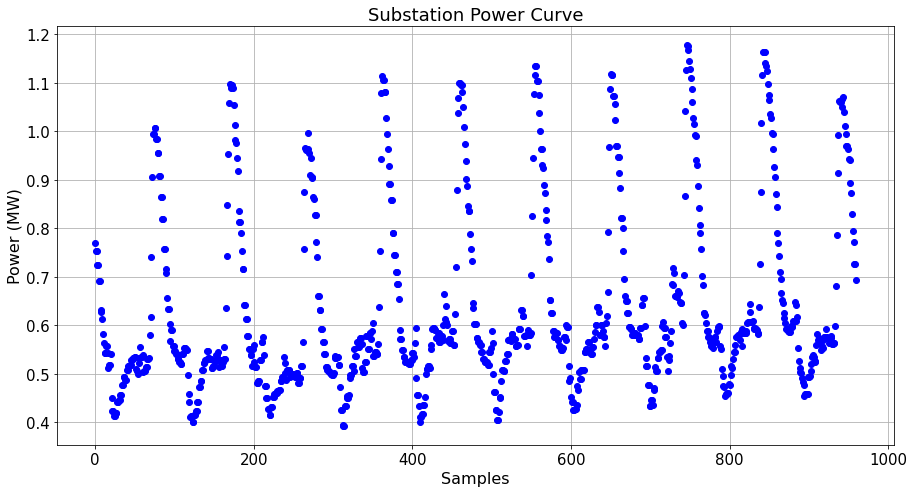

In [5]:
plt.figure(figsize=(15,7.7))
plt.grid()
plt.title("Substation Power Curve", fontsize=18)
plt.plot(data['P'], 'ob', linewidth=3.5)
plt.ylabel("Power (MW)", fontsize=16)
plt.xlabel("Samples", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### 4.3 Inserting outliers

In [6]:
data['label'] = 0

In [7]:
t_in_samples = np.linspace(0, len(data['P']), len(data['P']))

In [8]:
outliers_percentage = 4/100

o = sample(range(10, len(data['P'])), k=np.round(outliers_percentage*len(data['P'])).astype(int))

#Outliers do tipo zero
z = o[0:np.round(len(o)/2).astype(int)]


#Outliers do tipo pico
p = o[np.round(len(o)/2).astype(int): -1]

len(o)

38

#### Peak-type outliers will have **twice** the magnitude. Therefore:

In [9]:
data['P'].iloc[p] = 2*data['P'].iloc[p]
data['label'].iloc[p] = 1

C:\Users\Samsung\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


#### Zero-type outliers has value equals **zero**:

In [10]:
data['P'].iloc[z] = 0
data['label'].iloc[z] = 1

In [11]:
data.head()

,Date,Hour,P,label
0,2010-01-01,00:00:00,0.770,0
1,2010-01-01,00:15:00,0.754,0
2,2010-01-01,00:30:00,0.754,0
3,2010-01-01,00:45:00,0.724,0
4,2010-01-01,01:00:00,0.724,0


### Let's see the new curve:

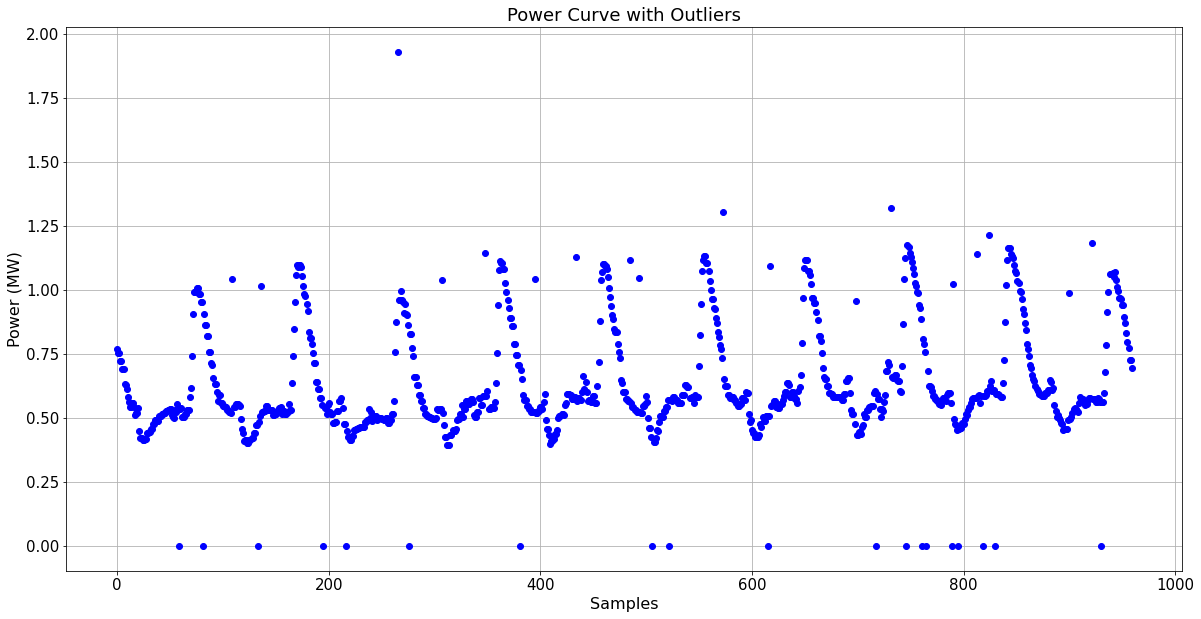

In [12]:
plt.figure(figsize=(20,10))
plt.grid()
plt.title("Power Curve with Outliers", fontsize=18)
plt.plot(data['P'], 'ob', linewidth=3.5)
plt.ylabel("Power (MW)", fontsize=16)
plt.xlabel("Samples", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## 5. Outlier Detection

In [13]:
teda = TEDADetect()
teda.run_offline(data, ['P'], 2.65)

Outlier value counts
0    920
1     40
Name: is_outlier, dtype: int64


<Figure size 1440x576 with 0 Axes>

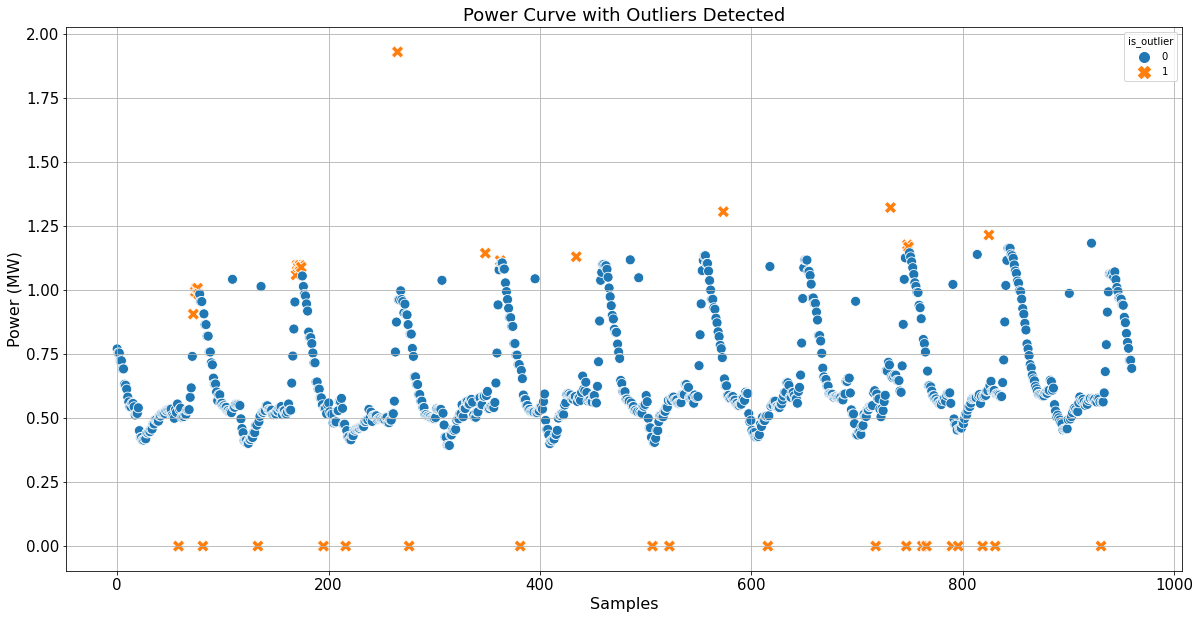

In [14]:
fig= plt.figure(figsize=(20,8))
plt.figure(figsize=(20,10))
plt.grid()
plt.title("Power Curve with Outliers Detected", fontsize=18)
sns.scatterplot(x=t_in_samples, y=data['P'], hue=data['is_outlier'], style=data['is_outlier'], size=data['is_outlier'], sizes=(150, 100))
plt.ylabel("Power (MW)", fontsize=16)
plt.xlabel("Samples", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## 6. Metrics evaluation:

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error

#### Confusion matrix:
\begin{equation}
    CM = \begin{bmatrix}
    TN & FP\\ 
    FN & TP
    \end{bmatrix}
\end{equation}


In [16]:
print(confusion_matrix(data['label'], data['is_outlier']))

[[908  15]
 [ 12  25]]


#### Classification report:

In [17]:
print(classification_report(data['label'], data['is_outlier']))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       923
           1       0.62      0.68      0.65        37

    accuracy                           0.97       960
   macro avg       0.81      0.83      0.82       960
weighted avg       0.97      0.97      0.97       960



## 6. "Grid Search":

#### Now, we are going to use several threshold values to see the TEDA behavior. In this Section, the metric used will be the mean squared error (MSE).

In [18]:
# Threshold values
THR = [1.1, 1.25, 1.5, 1.75, 2, 2.2, 2.5, 2.75, 3, 3.5, 4, 4.5, 5, 7, 9, 11]

In [19]:
teda = TEDADetect()
MSE = []
for threshold in THR:
    teda.run_offline(data, ['P'], threshold)
    mse = mean_squared_error(data['label'], data['is_outlier'])
    MSE.append(mse)

Outlier value counts
0    741
1    219
Name: is_outlier, dtype: int64
Outlier value counts
0    790
1    170
Name: is_outlier, dtype: int64
Outlier value counts
0    816
1    144
Name: is_outlier, dtype: int64
Outlier value counts
0    854
1    106
Name: is_outlier, dtype: int64
Outlier value counts
0    883
1     77
Name: is_outlier, dtype: int64
Outlier value counts
0    912
1     48
Name: is_outlier, dtype: int64
Outlier value counts
0    935
1     25
Name: is_outlier, dtype: int64
Outlier value counts
0    938
1     22
Name: is_outlier, dtype: int64
Outlier value counts
0    957
1      3
Name: is_outlier, dtype: int64
Outlier value counts
0    959
1      1
Name: is_outlier, dtype: int64
Outlier value counts
0    959
1      1
Name: is_outlier, dtype: int64
Outlier value counts
0    959
1      1
Name: is_outlier, dtype: int64
Outlier value counts
0    959
1      1
Name: is_outlier, dtype: int64
Outlier value counts
0    960
Name: is_outlier, dtype: int64
Outlier value counts
0    960

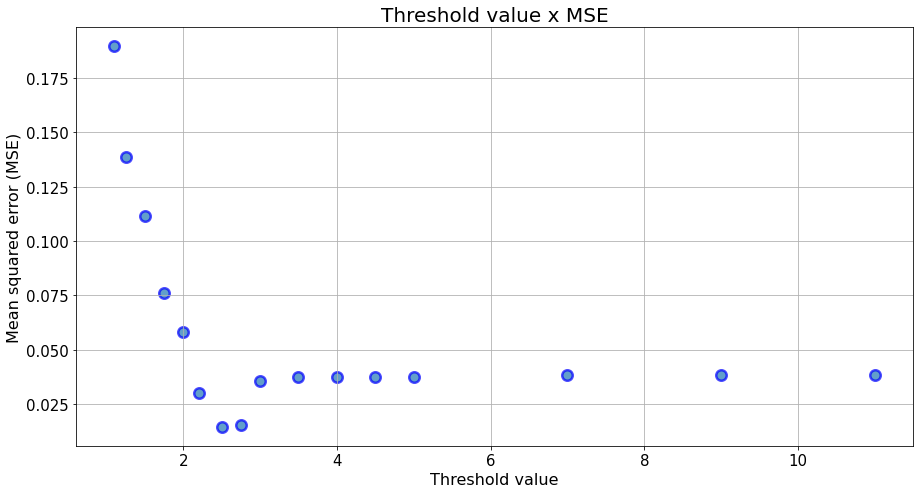

In [20]:
fig, ax = plt.subplots(figsize = (15,7.7))
ax.scatter(x=THR, y=MSE, linewidth=2.5, s=110, alpha=0.7, edgecolors="b")
plt.title("Threshold value x MSE", fontsize=20)
plt.xlabel("Threshold value", fontsize=16)
plt.ylabel("Mean squared error (MSE)", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.show()

# 📝 Homework:
### Modify the distance type (*Euclidean* or *cosine* or *Mahalonobis*) in the algorithm.

# 7. References

[[1]](https://www.researchgate.net/publication/301411485_Anomaly_detection_based_on_eccentricity_analysis) Angelov, Plamen. (2014). *Anomaly detection based on eccentricity analysis*. 1-8. 10.1109/EALS.2014.7009497. 



[[2]](https://www.mdpi.com/1424-8220/22/10/3838) Andrade, P.; Silva, I.; Silva, M.; Flores, T.; Cassiano, J.; Costa, D.G. *A TinyML Soft-Sensor Approach for Low-Cost Detection and Monitoring of Vehicular Emissions*. Sensors 2022, 22, 3838. doi: 10.3390/s22103838

[[3]](https://ieeexplore.ieee.org/document/536707) A. Bernieri, G. Betta and C. Liguori, *"On-line fault detection and diagnosis obtained by implementing neural algorithms on a digital signal processor"* in IEEE Transactions on Instrumentation and Measurement, vol. 45, no. 5, pp. 894-899, Oct. 1996, doi: 10.1109/19.536707.
